In [20]:
#Name: Vedant Paresh Shah
#NET ID: VXS200021
#Course: AI CS6364.002

# Question 5:

In [34]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [22]:
epochs = 10
out_features = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [23]:
train_dataset = torchvision.datasets.FashionMNIST(root = './data', train = True, transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1307,), std = (0.3081,))]),download = True)

test_dataset = torchvision.datasets.FashionMNIST(root = './data',train = False, transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1325,), std = (0.3105,))]),download=True)

In [24]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size = 128,shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = 128,shuffle = True)

In [25]:
class LeNet5(nn.Module):
    def __init__(self, out_features):
        super(LeNet5, self).__init__()
        self.layer_1 = nn.ModuleList([
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(6),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2)
        ])
        
        self.layer_2 = nn.ModuleList([
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.BatchNorm2d(16),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            
        ])
        
        self.layer_3 = nn.ModuleList([
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5,stride=1),
            nn.Tanh()
        ])
        
        self.layer_4 = nn.ModuleList([
            nn.Flatten(start_dim=1),
            nn.Linear(120 , 84),
            nn.Tanh(),
            nn.Linear(84, out_features)
        ])
        
    def forward(self, x):
        out = x
        for layer in self.layer_1:
            out = layer(out)

        for layer in self.layer_2:
            out = layer(out)
        
        for layer in self.layer_3:
            out = layer(out)
            
        for layer in self.layer_4:
            out = layer(out)
        return out

In [26]:
model = LeNet5(out_features).to(device)
cost = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
total_step = len(train_loader)

In [27]:
total_losses = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):  
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = cost(outputs, labels)
        total_losses = loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 400 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, i+1, total_step, loss.item()))

Epoch [1/10], Step [400/469], Loss: 0.3665
Epoch [2/10], Step [400/469], Loss: 0.3648
Epoch [3/10], Step [400/469], Loss: 0.3099
Epoch [4/10], Step [400/469], Loss: 0.4757
Epoch [5/10], Step [400/469], Loss: 0.2369
Epoch [6/10], Step [400/469], Loss: 0.2056
Epoch [7/10], Step [400/469], Loss: 0.2562
Epoch [8/10], Step [400/469], Loss: 0.1806
Epoch [9/10], Step [400/469], Loss: 0.1907
Epoch [10/10], Step [400/469], Loss: 0.2035


In [43]:
correctness = []
totalness = []
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        correctness = correct.value().append()
        totalness = total

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

AttributeError: 'int' object has no attribute 'value'

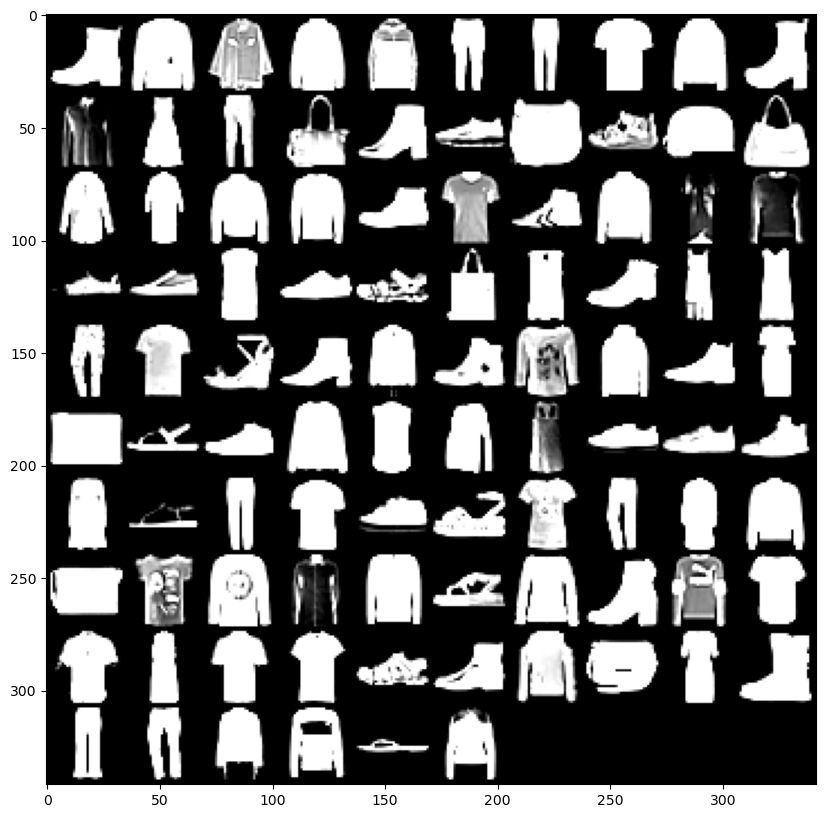

In [35]:
for images,labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)
plt.figure(figsize=(10,10))
grid = torchvision.utils.make_grid(tensor=images, nrow=10)
grid = np.clip(grid,0,1)
plt.imshow(X=np.transpose(grid, axes=(1,2,0)), cmap="gray");

In [42]:
print(totalness)

10000
